In [355]:
import numpy as np
import pandas as pd
import mglearn
import matplotlib.pyplot as plt
from IPython.display import display

## 데이터 불러오기

In [356]:
data = pd.read_csv("../final.csv")

## 데이터 분석 및 전처리

In [357]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 15 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   fine_dust                                       230 non-null    int64  
 1   O3                                              230 non-null    int64  
 2   region                                          230 non-null    object 
 3   heavy_metal                                     230 non-null    float64
 4   traffic                                         230 non-null    float64
 5   num_of_factories                                230 non-null    int64  
 6   num_of_power_plants                             230 non-null    int64  
 7   num_of_people                                   230 non-null    int64  
 8   household_waste_discharge_per_person (kg/days)  230 non-null    float64
 9   wind_speed                                 

미세먼지 나쁜 지역

In [358]:
a = data[data.iloc[:,0] == 0]

In [359]:
a.iloc[:,0:3:2]

,fine_dust,region
0,0,강원도강릉시
1,0,강원도고성군
2,0,강원도동해시
3,0,강원도삼척시
4,0,강원도속초시
...,...,...
201,0,제주특별자치도제주시
202,0,충청남도계룡시
218,0,충청북도괴산군
219,0,충청북도단양군


미세먼지 좋은 지역

In [360]:
b = data[data.iloc[:,0] == 1]

In [361]:
b.iloc[:,0:3:2]

,fine_dust,region
11,1,강원도철원군
14,1,강원도평창군
15,1,강원도홍천군
19,1,경기도고양시
20,1,경기도과천시
...,...,...
225,1,충청북도증평군
226,1,충청북도진천군
227,1,충청북도청원군
228,1,충청북도청주시


## 데이터 X,y로 분리

In [362]:
X = data.iloc[:, 2:13]

In [363]:
y=data.iloc[:,0]

# Decision Tree

train,test, validation 분리, linear regression 제외하고 모두 이 train test val을 쓸 것이다.

In [364]:
from sklearn.model_selection import train_test_split

In [365]:
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify = y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify = y_train, random_state=42)

In [366]:
print(X_train.shape, X_val.shape ,X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(129, 11) (43, 11) (58, 11) (129,) (43,) (58,)


train, test, val에서 region colunm 따로 빼서 list저장

In [367]:
x_train_region = X_train.pop("region")
x_test_region = X_test.pop("region")
x_val_region = X_val.pop("region")

In [368]:
x_train_region = list(x_train_region)
x_test_region = list(x_test_region)
x_val_region = list(x_val_region)

최적의 하이퍼파라미터 max_depth, min_samples_leaf 서치

In [369]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
training_accuracy = []
val_accuracy = []

msl_settings = [3, 5, 7,8, 9, 10, 20]
md_settings = [1,2, 5, 7, 13, 20, 30]
for msl in msl_settings:
    for md in md_settings:
        clf = DecisionTreeClassifier(max_depth =md, min_samples_leaf = msl, random_state =0)
        clf.fit(X_train, y_train)
        y_train_hat = clf.predict(X_train)
        y_val_hat = clf.predict(X_val)
        
        training_accuracy.append(accuracy_score(y_train, y_train_hat))
        val_accuracy.append(accuracy_score(y_val, y_val_hat))

In [370]:
pd.DataFrame({"min_samples_leaf":sorted(msl_settings*7), "max_depth":md_settings*7, "training accuracy": training_accuracy, "validation accuracy": val_accuracy})

,min_samples_leaf,max_depth,training accuracy,validation accuracy
0,3,1,0.751938,0.720930
1,3,2,0.844961,0.790698
2,3,5,0.914729,0.813953
3,3,7,0.937984,0.837209
4,3,13,0.937984,0.837209
5,3,20,0.937984,0.837209
6,3,30,0.937984,0.837209
7,5,1,0.751938,0.720930
8,5,2,0.844961,0.790698
9,5,5,0.906977,0.813953


최종 모델링

In [371]:
clf = DecisionTreeClassifier(max_depth =7, min_samples_leaf = 10, random_state =0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, random_state=0)

In [372]:
y_train_hat = clf.predict(X_train)
y_val_hat = clf.predict(X_val)
y_test_hat = clf.predict(X_test)

In [373]:
predict_dt = []
for i in y_test_hat:
    predict_dt.append(i)
actual_value_dt = []
for i in y_test:
    actual_value_dt.append(i)

meta_data = list(zip(x_test_region,predict_dt, actual_value_dt))

In [374]:
DT = pd.DataFrame(data = meta_data,columns=['region','fine_dust_predict', 'fine_dust_value'])

In [375]:
DT

,region,fine_dust_predict,fine_dust_value
0,전라북도정읍시,1,0
1,부산광역시연제구,0,0
2,광주광역시남 구,0,0
3,경상남도밀양시,0,0
4,경기도광주시,1,1
5,강원도홍천군,0,1
6,울산광역시울주군,0,0
7,전라북도임실군,0,1
8,경기도과천시,0,1
9,경상북도상주시,1,1


정확도

In [376]:
from sklearn.metrics import confusion_matrix
print("Accuracy on training set: {:.2f}".format(accuracy_score(y_train, y_train_hat)))
print("Accuracy on test set: {:.2f}".format(accuracy_score(y_test, y_test_hat)))
print(confusion_matrix(y_test, y_test_hat))

Accuracy on training set: 0.86
Accuracy on test set: 0.78
[[24  5]
 [ 8 21]]


시각화1

[Text(0.5416666666666666, 0.9, 'X[7] <= -16.994\ngini = 0.5\nsamples = 129\nvalue = [64, 65]'),
 Text(0.3333333333333333, 0.7, 'X[4] <= 82190.0\ngini = 0.421\nsamples = 83\nvalue = [25, 58]'),
 Text(0.16666666666666666, 0.5, 'X[6] <= 3.72\ngini = 0.393\nsamples = 26\nvalue = [19, 7]'),
 Text(0.08333333333333333, 0.3, 'gini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.25, 0.3, 'gini = 0.117\nsamples = 16\nvalue = [15, 1]'),
 Text(0.5, 0.5, 'X[0] <= 0.539\ngini = 0.188\nsamples = 57\nvalue = [6, 51]'),
 Text(0.4166666666666667, 0.3, 'gini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.5833333333333334, 0.3, 'X[8] <= 55.425\ngini = 0.12\nsamples = 47\nvalue = [3, 44]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 28\nvalue = [0, 28]'),
 Text(0.6666666666666666, 0.1, 'gini = 0.266\nsamples = 19\nvalue = [3, 16]'),
 Text(0.75, 0.7, 'X[8] <= 49.15\ngini = 0.258\nsamples = 46\nvalue = [39, 7]'),
 Text(0.6666666666666666, 0.5, 'gini = 0.432\nsamples = 19\nvalue = [13, 6]'),
 Text(0.833333333333

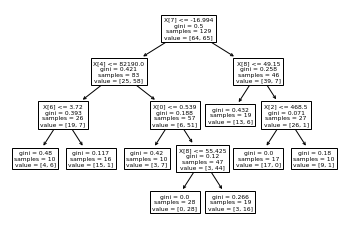

In [377]:
from sklearn import tree
import matplotlib.pyplot as plt
tree.plot_tree(clf)

시각화2

In [378]:
X.drop(['region'], axis=1, inplace=True)
from sklearn.tree import export_graphviz
export_graphviz(clf, out_file="tree.dot", class_names=["Bad", "Good"],
                feature_names=X.columns, impurity=False, filled=True)

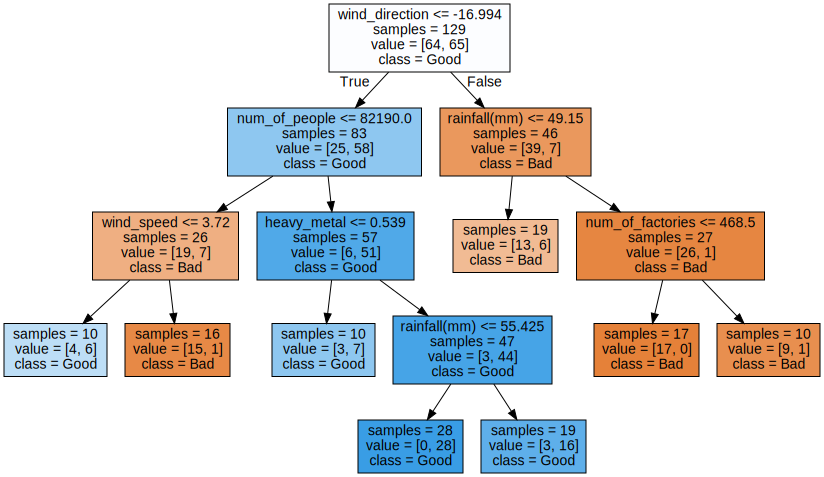

In [379]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

Feature importance 확인

In [380]:
print("Feature importances:")
print(clf.feature_importances_)

Feature importances:
[0.024 0.    0.003 0.    0.362 0.    0.092 0.459 0.06  0.   ]


In [381]:
X.columns

Index(['heavy_metal', 'traffic', 'num_of_factories', 'num_of_power_plants',
       'num_of_people', 'household_waste_discharge_per_person (kg/days)',
       'wind_speed', 'wind_direction', 'rainfall(mm)', 'C'],
      dtype='object')

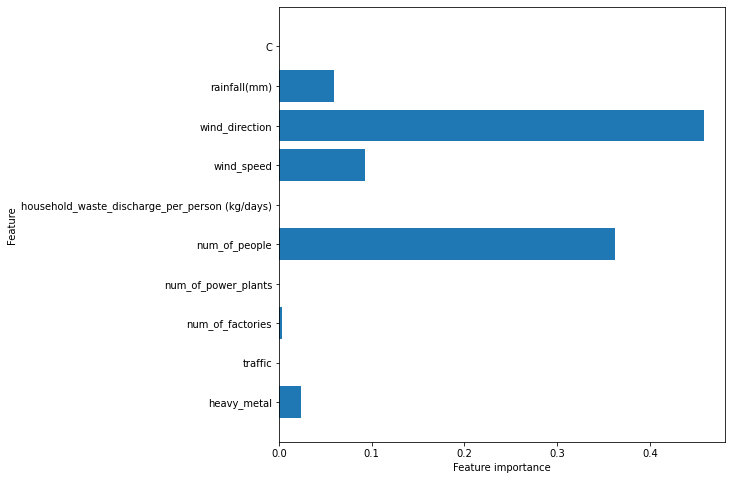

In [382]:
def plot_feature_importances_cancer(model):
    n_features = X.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plt.figure(figsize=(8,8))
plot_feature_importances_cancer(clf)

# SVM-StandardScaler

scaling

In [383]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

Text(0, 0.5, 'Feature magnitude')

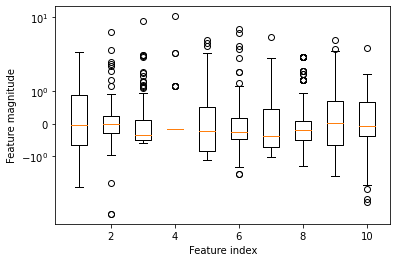

In [384]:
plt.boxplot(X_train_scaled, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")

최적의 하이퍼파라미터 C, gamma 서치

In [385]:
from sklearn.svm import SVC

training_accuracy = []
val_accuracy = []

C_settings = [0.01, 1, 10, 100, 1000]
gamma_settings = [0.01, 0.1, 1, 10, 100]
for C in C_settings:
    for gamma in gamma_settings:
        svc = SVC(C=C, kernel = 'rbf', gamma = gamma, random_state = 0)
        svc.fit(X_train_scaled, y_train)
        
        y_train_hat = svc.predict(X_train_scaled)
        y_val_hat = svc.predict(X_val_scaled)
        
        training_accuracy.append(accuracy_score(y_train, y_train_hat))
        val_accuracy.append(accuracy_score(y_val, y_val_hat))

In [386]:
pd.DataFrame({"C":sorted(C_settings*5), "gamma":gamma_settings*5, "training accuracy": training_accuracy, "validation accuracy": val_accuracy})

,C,gamma,training accuracy,validation accuracy
0,0.01,0.01,0.503876,0.511628
1,0.01,0.10,0.503876,0.511628
2,0.01,1.00,0.503876,0.511628
3,0.01,10.00,0.503876,0.511628
4,0.01,100.00,0.503876,0.511628
5,1.00,0.01,0.775194,0.837209
6,1.00,0.10,0.860465,0.813953
7,1.00,1.00,0.968992,0.674419
8,1.00,10.00,1.000000,0.581395
9,1.00,100.00,1.000000,0.511628


최종 모델링 후 정확도

In [387]:
from sklearn.metrics import confusion_matrix
svc = SVC(C=10, kernel = 'rbf', gamma = 0.01)
svc.fit(X_train_scaled, y_train)
        
y_train_hat = svc.predict(X_train_scaled)
y_test_hat = svc.predict(X_test_scaled)

print("Accuracy on training set: ", accuracy_score(y_train, y_train_hat))
print("Accuracy on testing set: ", accuracy_score(y_test, y_test_hat))
print(confusion_matrix(y_test, y_test_hat))

Accuracy on training set:  0.8294573643410853
Accuracy on testing set:  0.7413793103448276
[[20  9]
 [ 6 23]]


지역별 예측값 실제값 비교

In [388]:
predict_svms = []
for i in y_test_hat:
    predict_svms.append(i)
actual_value_svms = []
for i in y_test:
    actual_value_svms.append(i)

meta_data = list(zip(x_test_region,predict_svms, actual_value_svms))

SVMS = pd.DataFrame(data = meta_data,columns=['region','fine_dust_predict', 'fine_dust_value'])
SVMS

,region,fine_dust_predict,fine_dust_value
0,전라북도정읍시,0,0
1,부산광역시연제구,0,0
2,광주광역시남 구,0,0
3,경상남도밀양시,0,0
4,경기도광주시,1,1
5,강원도홍천군,1,1
6,울산광역시울주군,1,0
7,전라북도임실군,0,1
8,경기도과천시,1,1
9,경상북도상주시,0,1


# SVM-MinMaxScaler

scaling

Text(0, 0.5, 'Feature magnitude')

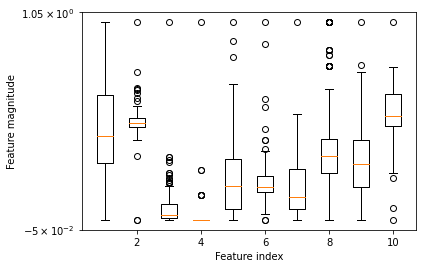

In [389]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
plt.boxplot(X_train_scaled, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")

최적의 하이퍼파라미터 C, gamma 서치

In [390]:
training_accuracy = []
val_accuracy = []

C_settings = [0.01, 0.1, 1, 10, 100]
gamma_settings = [0.01, 0.1, 1, 10, 100]
for C in C_settings:
    for gamma in gamma_settings:
        svc = SVC(C=C, kernel = 'rbf', gamma = gamma, random_state=0)
        svc.fit(X_train_scaled, y_train)
        
        y_train_hat = svc.predict(X_train_scaled)
        y_val_hat = svc.predict(X_val_scaled)
        
        training_accuracy.append(accuracy_score(y_train, y_train_hat))
        val_accuracy.append(accuracy_score(y_val, y_val_hat))

In [391]:
pd.DataFrame({"C":sorted(C_settings*5), "gamma":gamma_settings*5, "training accuracy": training_accuracy, "validation accuracy": val_accuracy})

,C,gamma,training accuracy,validation accuracy
0,0.01,0.01,0.503876,0.511628
1,0.01,0.10,0.503876,0.511628
2,0.01,1.00,0.503876,0.511628
3,0.01,10.00,0.503876,0.511628
4,0.01,100.00,0.503876,0.511628
5,0.10,0.01,0.503876,0.511628
6,0.10,0.10,0.503876,0.511628
7,0.10,1.00,0.767442,0.790698
8,0.10,10.00,0.837209,0.767442
9,0.10,100.00,0.503876,0.511628


최종 모델링 후 정확도

In [392]:
svc = SVC(C=10, kernel = 'rbf', gamma = 0.1)
svc.fit(X_train_scaled, y_train)
        
y_train_hat = svc.predict(X_train_scaled)
y_test_hat = svc.predict(X_test_scaled)

print("Accuracy on training set: ", accuracy_score(y_train, y_train_hat))
print("Accuracy on testing set: ", accuracy_score(y_test, y_test_hat))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_hat))

Accuracy on training set:  0.7984496124031008
Accuracy on testing set:  0.7241379310344828
[[22  7]
 [ 9 20]]


지역별 예측값 실제값 비교

In [393]:
predict_svmm = []
for i in y_test_hat:
    predict_svmm.append(i)
actual_value_svmm = []
for i in y_test:
    actual_value_svmm.append(i)

meta_data = list(zip(x_test_region,predict_svmm, actual_value_svmm))

SVMM = pd.DataFrame(data = meta_data,columns=['region','fine_dust_predict', 'fine_dust_value'])
SVMM

,region,fine_dust_predict,fine_dust_value
0,전라북도정읍시,0,0
1,부산광역시연제구,0,0
2,광주광역시남 구,0,0
3,경상남도밀양시,0,0
4,경기도광주시,1,1
5,강원도홍천군,1,1
6,울산광역시울주군,1,0
7,전라북도임실군,0,1
8,경기도과천시,1,1
9,경상북도상주시,0,1


# Logistic regression

scaling

In [394]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

최적의 파라미터 C 서치

In [395]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

training_accuracy = []
val_accuracy = []

C_settings = [0.01, 0.1, 1, 10, 100, 1000, 10000]
for C in C_settings:
    LR = LogisticRegression(C=C, max_iter = 1000, multi_class='ovr')
    LR.fit(X_train, y_train)
    
    y_train_hat = LR.predict(X_train)
    training_accuracy.append(accuracy_score(y_train, y_train_hat))
    
    y_val_hat = LR.predict(X_val)
    val_accuracy.append(accuracy_score(y_val, y_val_hat))

In [396]:
pd.DataFrame({"C":C_settings, "training accuracy": training_accuracy, "val accuracy": val_accuracy})

,C,training accuracy,val accuracy
0,0.01,0.751938,0.837209
1,0.10,0.767442,0.813953
2,1.00,0.751938,0.837209
3,10.00,0.751938,0.837209
4,100.00,0.767442,0.813953
5,1000.00,0.767442,0.813953
6,10000.00,0.782946,0.883721


In [397]:
LR = LogisticRegression(C=0.01, max_iter = 1000, multi_class='auto')
LR.fit(X_train, y_train)

LogisticRegression(C=0.01, max_iter=1000)

In [398]:
y_test_predict = LR.predict(X_test)
print(y_test_predict[0:100])

[1 0 0 0 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0
 1 1 0 1 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1 0]


정확도

In [399]:
y_train_predict = LR.predict(X_train_scaled)
y_test_predict = LR.predict(X_test)

print("Accuracy on training set: ", accuracy_score(y_train, y_train_predict))
print("Accuracy on testing set: ", accuracy_score(y_test, y_test_predict))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_hat))

Accuracy on training set:  0.6666666666666666
Accuracy on testing set:  0.7413793103448276
[[22  7]
 [ 9 20]]


c:\ProgramData\Anaconda3\envs\imgproc\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [400]:
predict_LR = []
for i in y_test_predict:
    predict_LR.append(i)
actual_value_svmm = []
for i in y_test:
    actual_value_svmm.append(i)

meta_data = list(zip(x_test_region,predict_LR, actual_value_svmm))

SVMM = pd.DataFrame(data = meta_data,columns=['region','fine_dust_predict', 'fine_dust_value'])
SVMM

,region,fine_dust_predict,fine_dust_value
0,전라북도정읍시,1,0
1,부산광역시연제구,0,0
2,광주광역시남 구,0,0
3,경상남도밀양시,0,0
4,경기도광주시,1,1
5,강원도홍천군,0,1
6,울산광역시울주군,1,0
7,전라북도임실군,1,1
8,경기도과천시,0,1
9,경상북도상주시,1,1


회귀계수

In [401]:
print("회귀계수:", LR.coef_," 상수항:", LR.intercept_)

회귀계수: [[-0.    -0.014  0.001  0.     0.    -0.    -0.002 -0.019 -0.016 -0.005]]  상수항: [-0.]


# Linear Regression

In [402]:
X = data.iloc[:, 2:13]
y = data.iloc[:, -1]

In [403]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [404]:
x_train_region = X_train.pop("region")
x_test_region = X_test.pop("region")
x_train_region = list(x_train_region)
x_test_region = list(x_test_region)

모델링

In [405]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_predict = lr_model.predict(X_test) #numpy array

print("회귀계수:", lr_model.coef_," 상수항:", lr_model.intercept_)

회귀계수: [ 2.199 -0.072  0.001  0.457  0.     0.144 -1.238 -0.041 -0.055 -0.709]  상수항: 59.38395133823418


정확도

In [406]:
R2 = lr_model.score(X_train, y_train)
print("결정계수:", R2)

결정계수: 0.4745643155100302


In [407]:
predict_LR = []
for i in y_predict:
    predict_LR.append(i)
actual_value_svmm = []
for i in y_test:
    actual_value_svmm.append(i)

meta_data = list(zip(x_test_region,predict_LR, actual_value_svmm))

SVMM = pd.DataFrame(data = meta_data,columns=['region','fine_dust_predict', 'fine_dust_value'])
SVMM

,region,fine_dust_predict,fine_dust_value
0,충청남도홍성군,46.218385,46.166667
1,경상남도합천군,39.118621,30.333333
2,강원도인제군,44.895638,34.833333
3,전라북도완주군,41.593626,45.000000
4,강원도홍천군,44.599627,47.000000
5,전라북도진안군,41.399238,37.666667
6,경기도김포시,54.721885,54.666667
7,전라북도임실군,42.949791,46.333333
8,인천광역시강화군,43.270353,41.405270
9,서울특별시강북구,44.542651,51.608070
